<a target="_blank" href="https://colab.research.google.com/github/StratosFair/Mean_Escape_Time/blob/main/Duffin_oscillator/Plots/Duffin_Oscillator_plot.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  Duffing oscillator process in a ball of $\mathbb{R}^2$ : visualization of trajectories and Monte Carlo estimation of MET

Based on the paper [A neural network solution of first-passage problems](https://link.springer.com/article/10.1007/s10483-024-3189-8) (Jiamin Qian, Lincong Chen & J. Q. Sun, Oct. 2024), the 2-dimensional Duffing oscillator is defined by:
$$ d \begin{pmatrix} X_1(t)\\
X_2(t) \end{pmatrix} = \begin{pmatrix} X_2\\
-X_1 - X_1^3 - 2\zeta X_2 \end{pmatrix} dt + \begin{pmatrix} dB_1(t)\\
\sqrt{2\zeta} dB_2(t) \end{pmatrix}$$

## 1) Visualization of the process:

In [ ]:
#parameters of simulation
r = 2
x_0 = np.zeros(2)
dt = 10**-3
max_steps = 500/dt

# Brownian motion in a ball
bm_1 = [x_0[0]]
bm_2 = [x_0[1]]
current_norm = 0
current_steps = 1

while current_norm < r :
    update_1, update_2 = np.random.normal(scale=np.sqrt(dt)), np.random.normal(scale=np.sqrt(dt))
    bm_1.append(bm_1[-1] + update_1)
    bm_2.append(bm_2[-1] + update_2)
    current_norm = np.linalg.norm((bm_1[-1],bm_2[-1]))
    if current_steps >= max_steps - 1 :
        break
    current_steps += 1

In [ ]:
#Duffin-oscillator process in same ball
zeta = 0.08
do_1 = [x_0[0]]
do_2 = [x_0[1]]
current_norm = 0
current_steps = 1

while current_norm < r :
    update_1 = do_2[-1]*dt
    update_2 = -(do_1[-1] + do_1[-1]**3 + 2*zeta*do_2[-1])*dt  \
        + np.sqrt(2 * zeta) *np.random.normal(scale=np.sqrt(dt))
    do_1.append(do_1[-1] + update_1)
    do_2.append(do_2[-1] + update_2)
    current_norm = np.linalg.norm((do_1[-1],do_2[-1]))
    if current_steps >= max_steps - 1 :
        break
    current_steps += 1

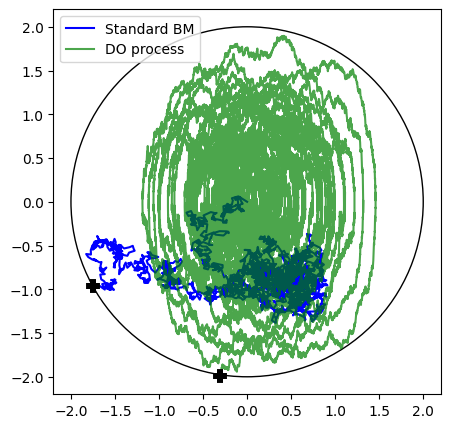

In [ ]:
#plotting the brownian motion and Dufflin Oscillator process together

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(bm_1,bm_2, c='b', label = "Standard BM")
ax.plot(do_1, do_2, c='g', alpha=0.7, label = "DO process")
ax.plot(do_1[-1], do_2[-1], 'k+', mew=10, ms=5)
ax.plot(bm_1[-1], bm_2[-1], 'k+', mew=10, ms=5)
circle = plt.Circle((0,0),r , fill = False)
ax.add_artist(circle)
ax.set_xlim([-1.1*r, 1.1*r])
ax.set_ylim([-1.1*r, 1.1*r])
ax.legend()
#plt.autoscale(False, tight=False)
plt.show()

## 2) Monte Carlo computation of MET

A closed form solution for this problem is not tractable (?), hence we will estimate it with Monte Carlo methods

In [ ]:
n_mc = 100

def do_monte_carlo_timer(x,y):

    times = []

    for k in range(n_mc):
        do_1 = [x]
        do_2 = [y]
        current_norm = 0
        current_steps = 1
        while current_norm < r :
            update_1 = do_2[-1]*dt
            update_2 = -(do_1[-1] + do_1[-1]**3 + 2*zeta*do_2[-1])*dt  \
                + np.sqrt(2 * zeta) *np.random.normal(scale=np.sqrt(dt))
            do_1.append(do_1[-1] + update_1)
            do_2.append(do_2[-1] + update_2)
            current_norm = np.linalg.norm((do_1[-1],do_2[-1]))
            if current_steps >= max_steps - 1 :
                break
            current_steps += 1
        times.append(current_steps)
    return dt * sum(times)/n_mc

monte_carlo_solution = np.vectorize(do_monte_carlo_timer)

In [ ]:
#hyperparams
zeta = 0.08
r = 2
dt = 10**-2
max_steps = 50/dt

#plotting the function
n_points = 300
tt = np.linspace(-1, 1, n_points) * r
xx, yy = np.meshgrid(tt, tt)  # create unit square grid

xx, yy = np.where(xx**2 + yy**2 <= r**2, xx, 0), np.where(xx**2 + yy**2 <= r**2 , yy, 0)
zz = monte_carlo_solution(xx,yy)

KeyboardInterrupt: 

In [ ]:
#circle
a = np.linspace(0, 2*np.pi, 50)
cx,cy = np.cos(a) * r , np.sin(a)*r

fig, ax = plt.subplots()
ax.plot(cx, cy,'k-', alpha=.2)

contour = ax.contourf(xx, yy, zz, levels=50)  # 50 contour levels
ax.set_title("Monte Carlo solution estimate")
cb = fig.colorbar(contour, ax=ax)